In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [14]:
data = pd.read_csv('/content/Housing_Prices.csv')


In [50]:
data.head(8)


,ID,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,price
8,9,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished,9870000
9,10,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished,9800000
10,11,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished,9800000
11,12,6000,4,3,2,yes,yes,yes,yes,no,2,no,semi-furnished,9681000
12,13,6550,4,2,2,yes,no,no,no,yes,1,yes,semi-furnished,9310000
13,14,3500,4,2,2,yes,no,no,yes,no,2,no,furnished,9240000
14,15,7800,3,2,2,yes,no,no,no,no,0,yes,semi-furnished,9240000
15,16,6000,4,1,2,yes,no,yes,no,no,2,no,semi-furnished,9100000


In [16]:
data.describe()


,ID,area,bedrooms,bathrooms,stories,parking,price
count,545.00000,545.000000,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,273.00000,5150.541284,2.965138,1.286239,1.805505,0.693578,4.766729e+06
std,157.47222,2170.141023,0.738064,0.502470,0.867492,0.861586,1.870440e+06
min,1.00000,1650.000000,1.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,137.00000,3600.000000,2.000000,1.000000,1.000000,0.000000,3.430000e+06
50%,273.00000,4600.000000,3.000000,1.000000,2.000000,0.000000,4.340000e+06
75%,409.00000,6360.000000,3.000000,2.000000,2.000000,1.000000,5.740000e+06
max,545.00000,16200.000000,6.000000,4.000000,4.000000,3.000000,1.330000e+07


In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
 13  price             545 non-null    int64 
dtypes: int64(7), object(7)
memory usage: 59.7+ KB


In [18]:
data.shape


(545, 14)

In [19]:
data.isna().sum()


ID                  0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
price               0
dtype: int64

**Exploratory Data Analysis**

In [20]:
num_col = ['price','area']

cat_col = ['bedrooms','bathrooms','stories','mainroad','guestroom','basement',
           'hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']

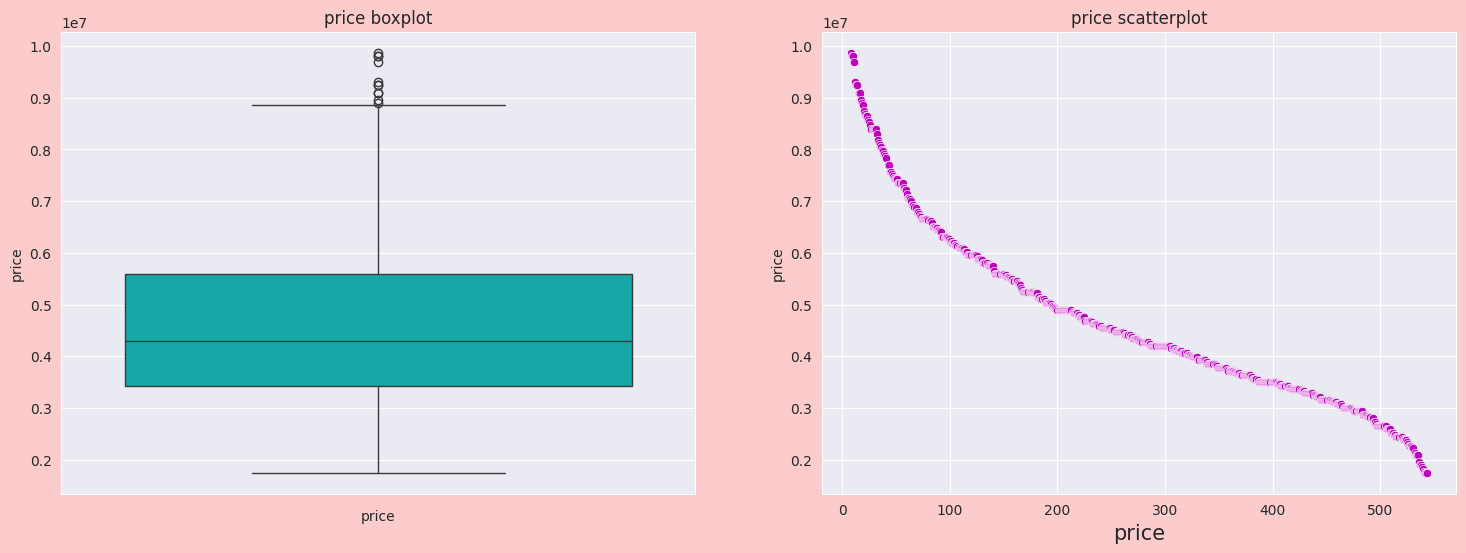

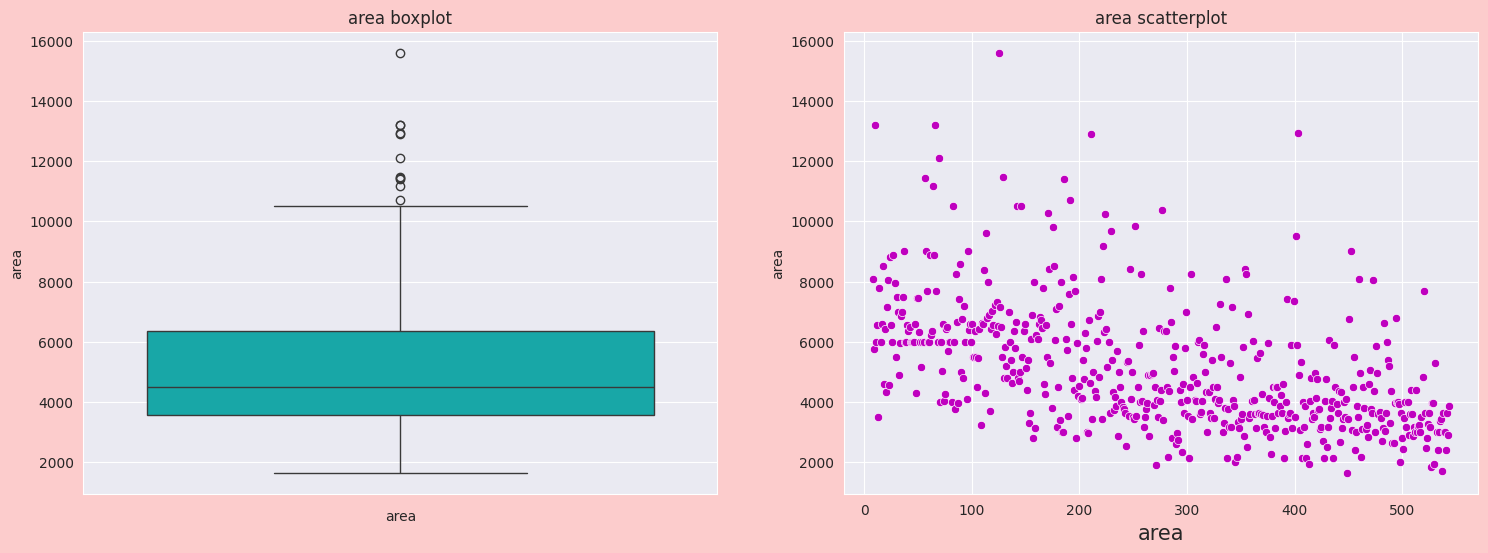

In [53]:
sns.set_style('darkgrid')
for feat in num_col:

    plt.figure(figsize=(18,6),edgecolor= 'green',facecolor= '#FCCCCC')
    ax1 = plt.subplot(1,2,1)
    sns.boxplot(data[feat],color='c')  #Boxplot
    plt.title(feat + ' boxplot')      # plot title
    plt.xlabel(feat,fontsize=10)      # X-axis label

    print('\n')

    ax2 = plt.subplot(1,2,2)
    sns.scatterplot(data[feat],color='m') #Scatterplot
    plt.title(feat + ' scatterplot')       # plot title
    plt.xlabel(feat,fontsize=15)            # X-axis label
    plt.show()

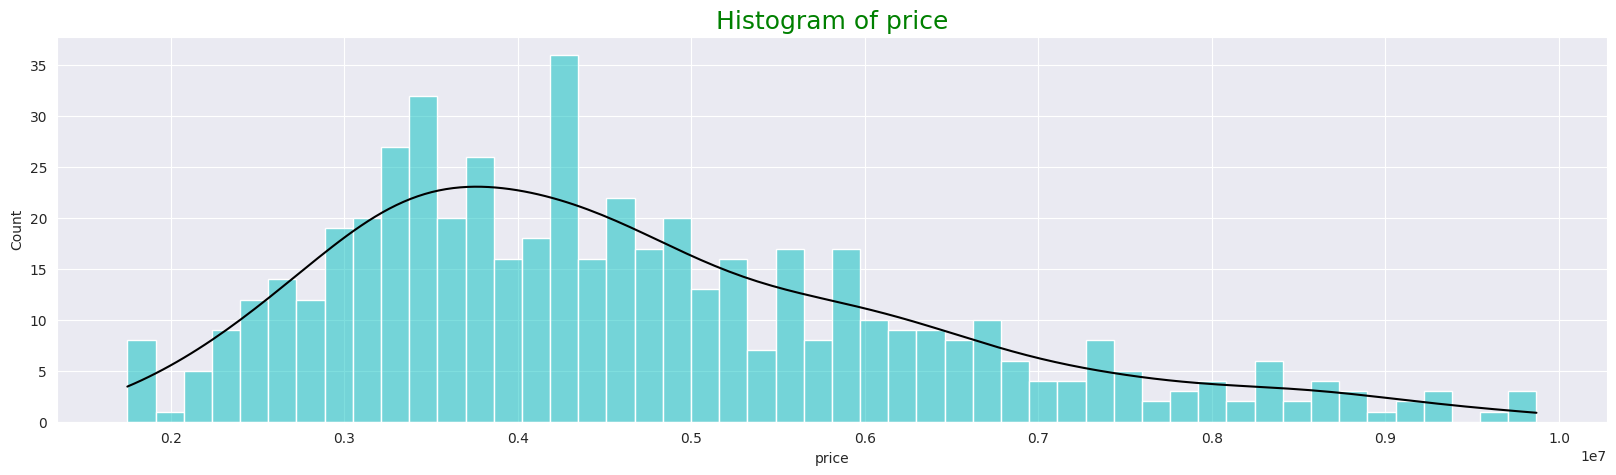

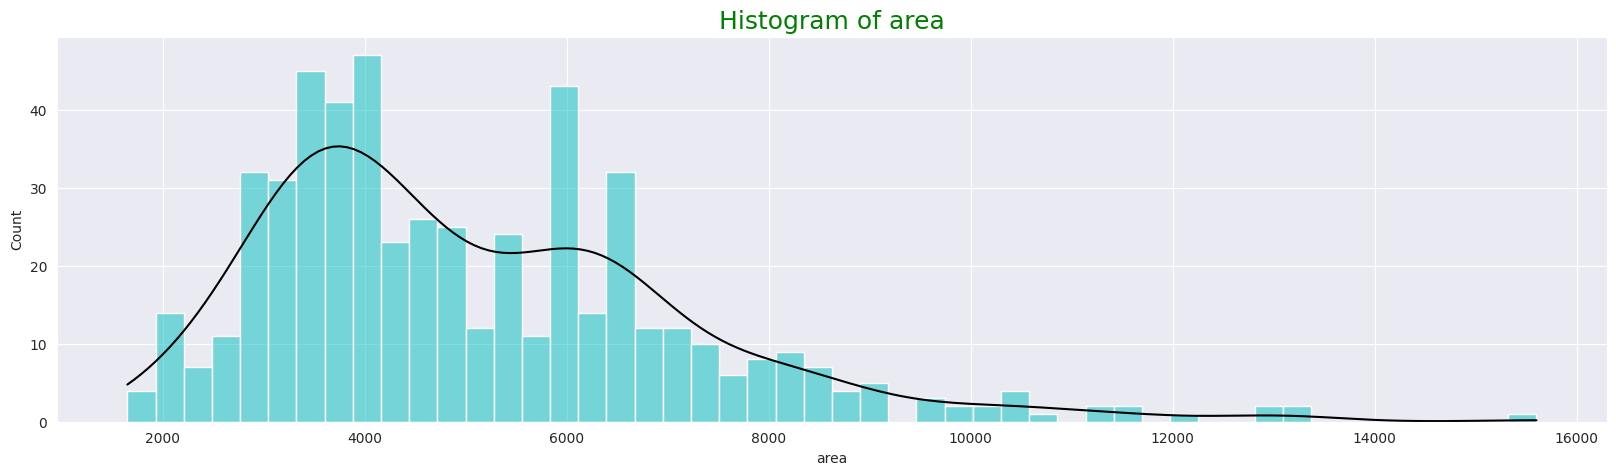

In [54]:
# plots for numerical columns
for i in num_col:
    plt.figure(figsize=(20,5))
    ax = sns.histplot(data=data,x=i,bins=50,kde=True,color='c')
    ax.lines[0].set_color('black')
    plt.title(f'Histogram of {i}',fontdict={'size':18,'color': 'green'})
    plt.show()

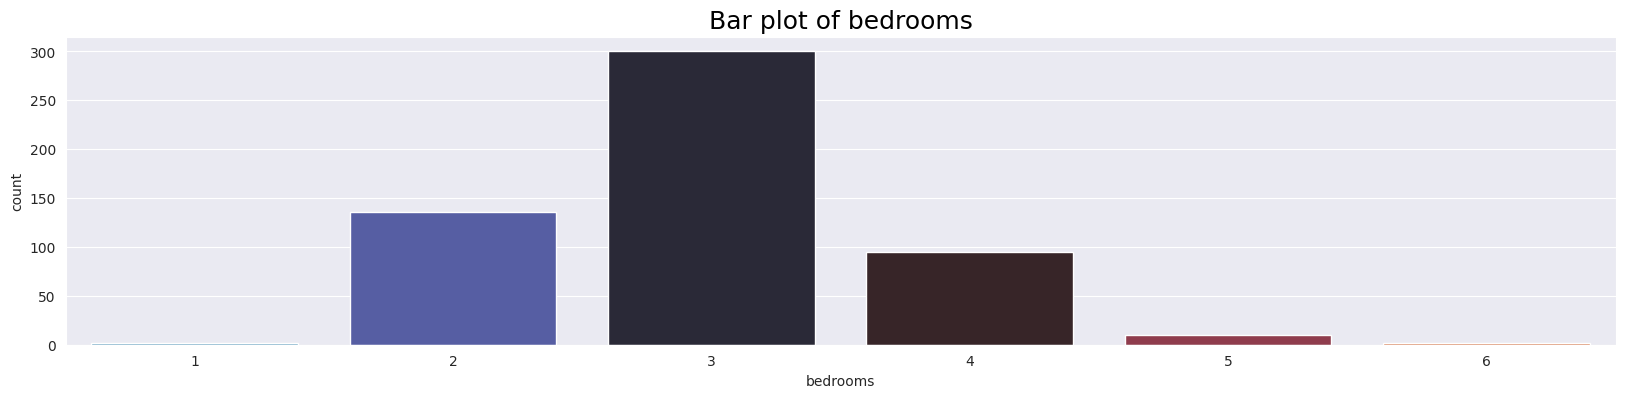

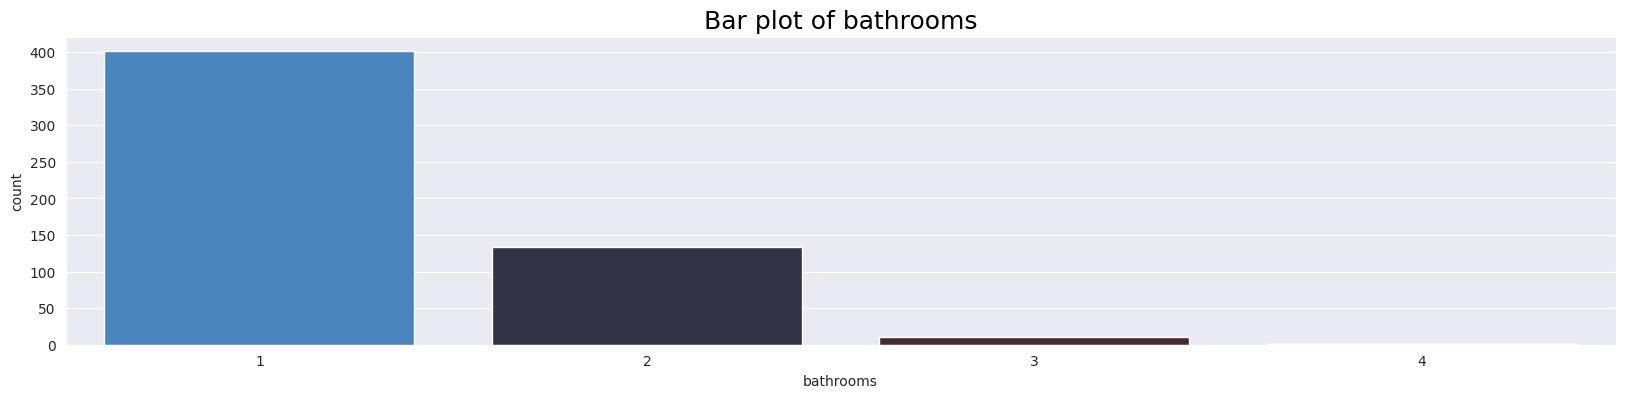

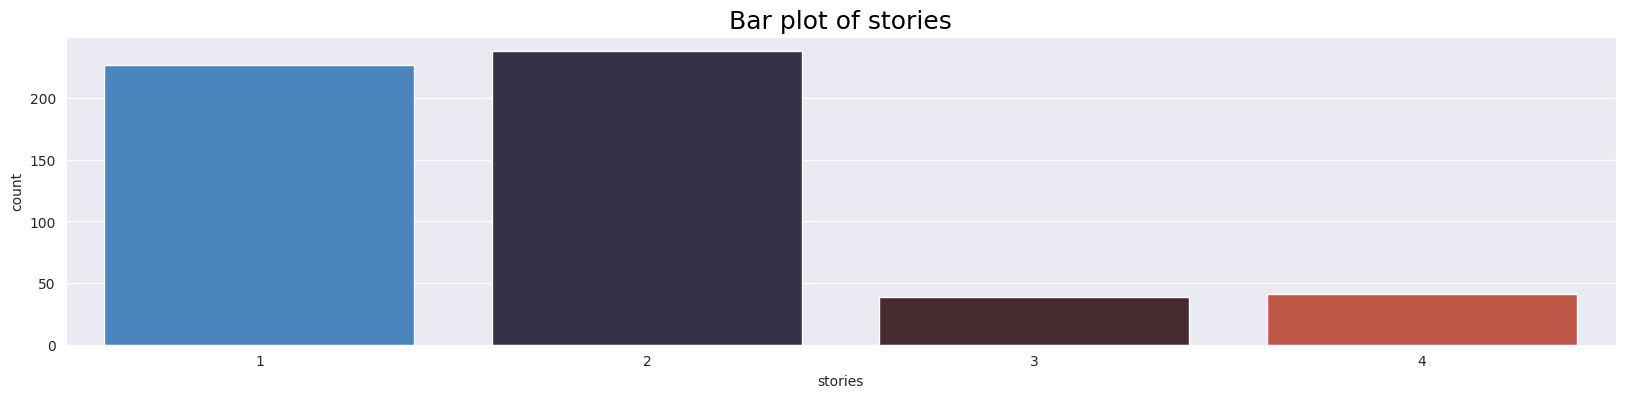

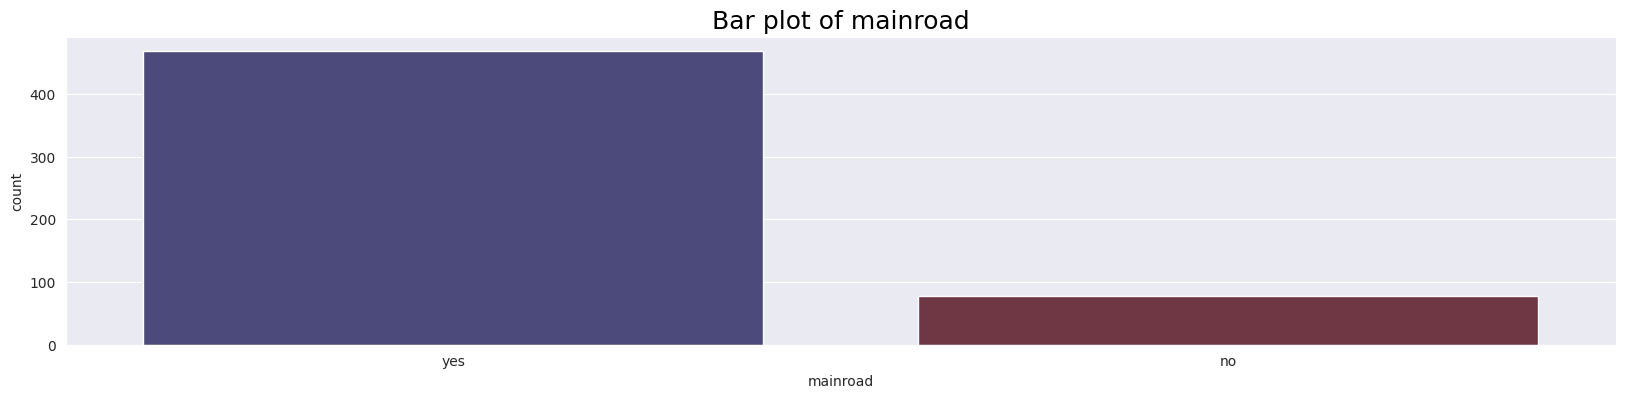

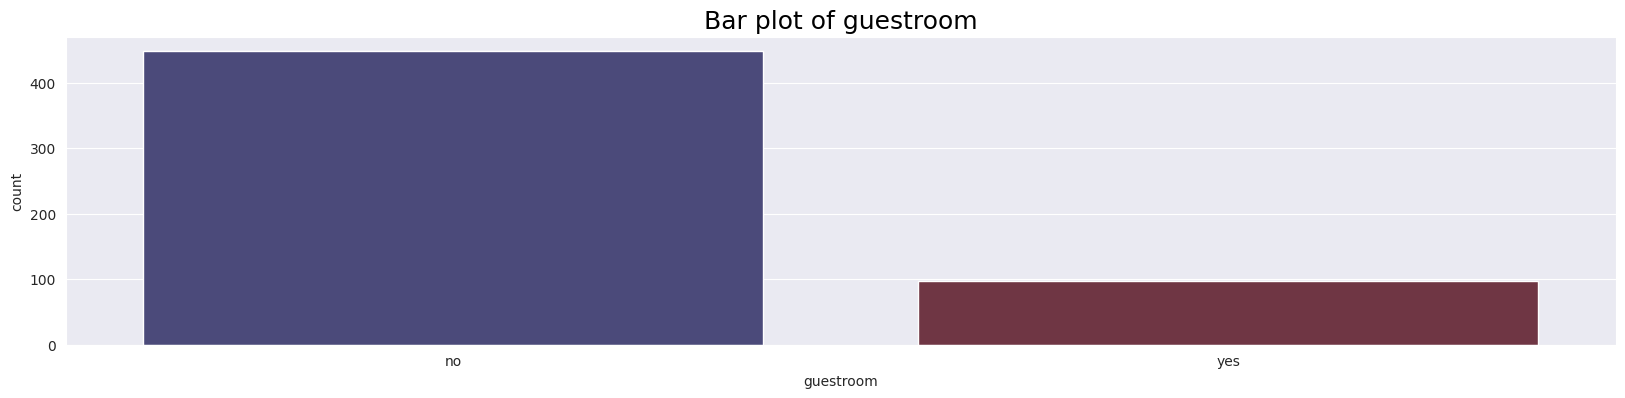

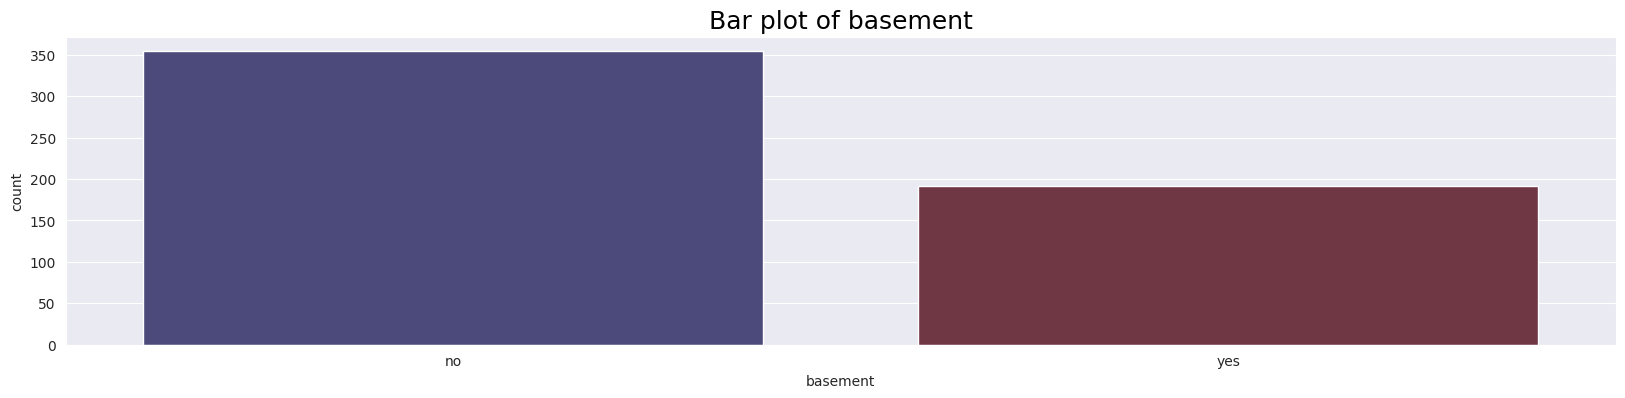

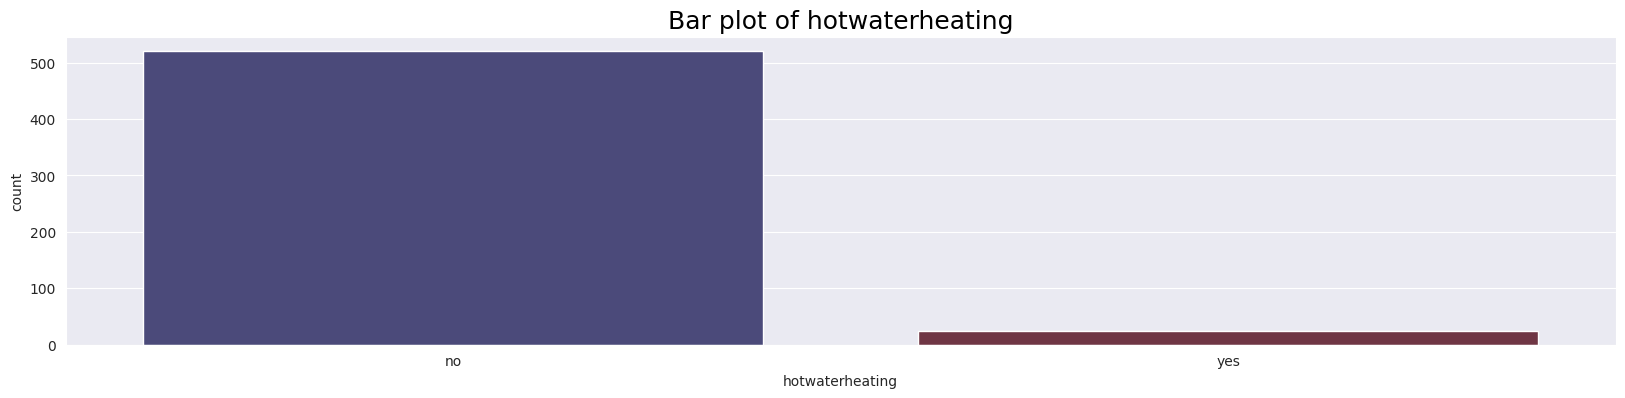

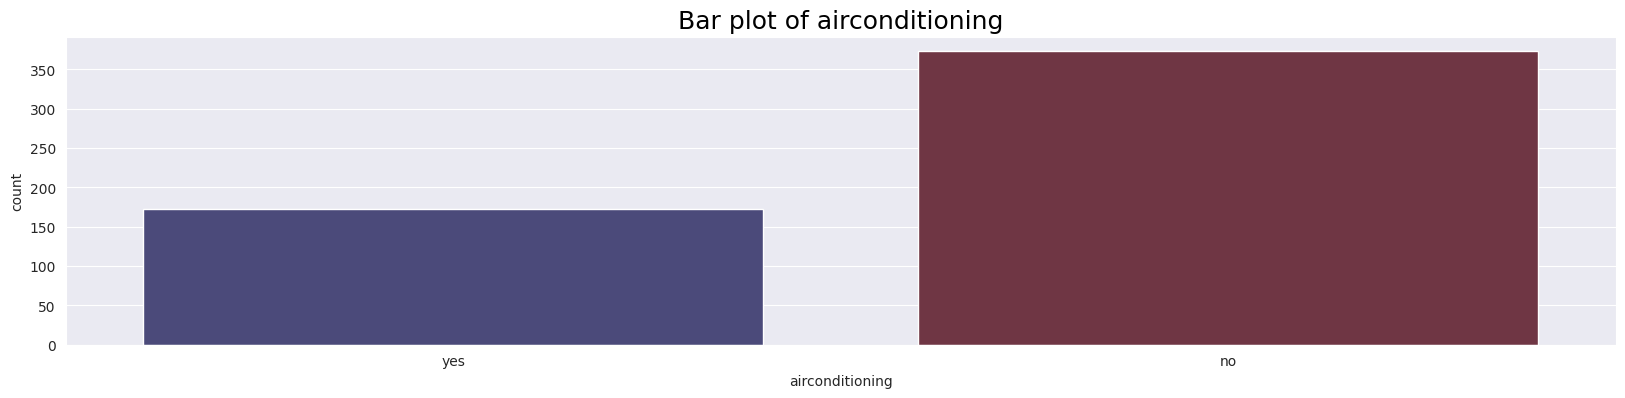

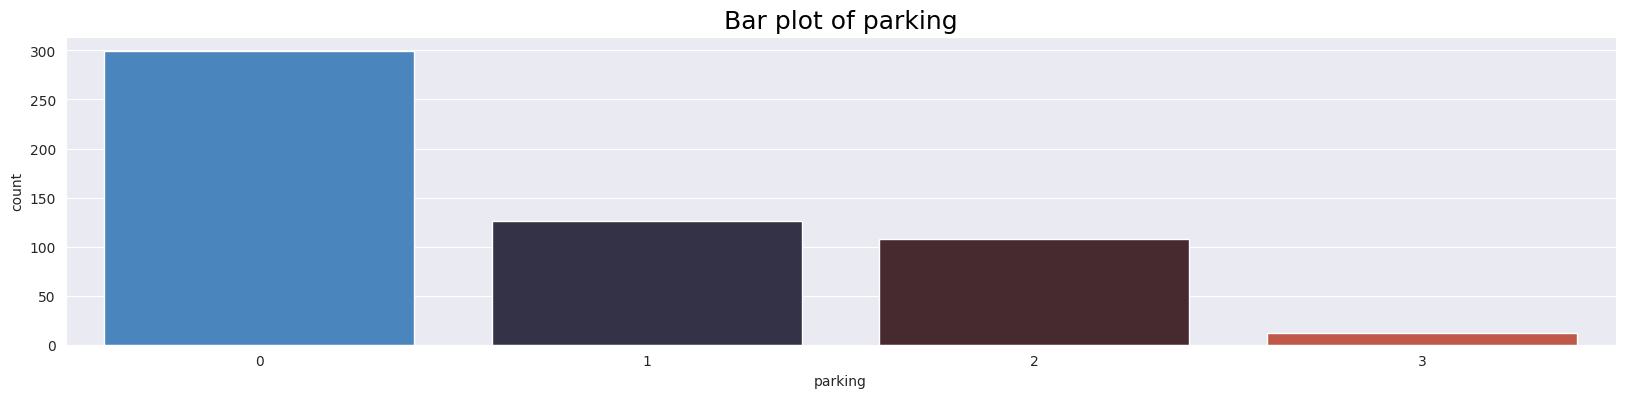

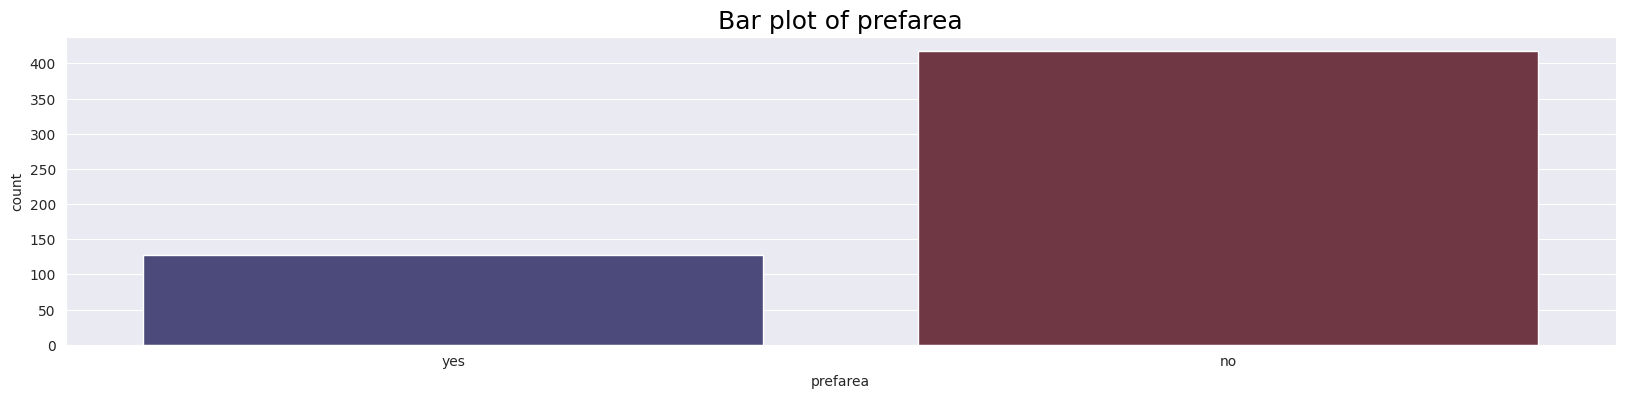

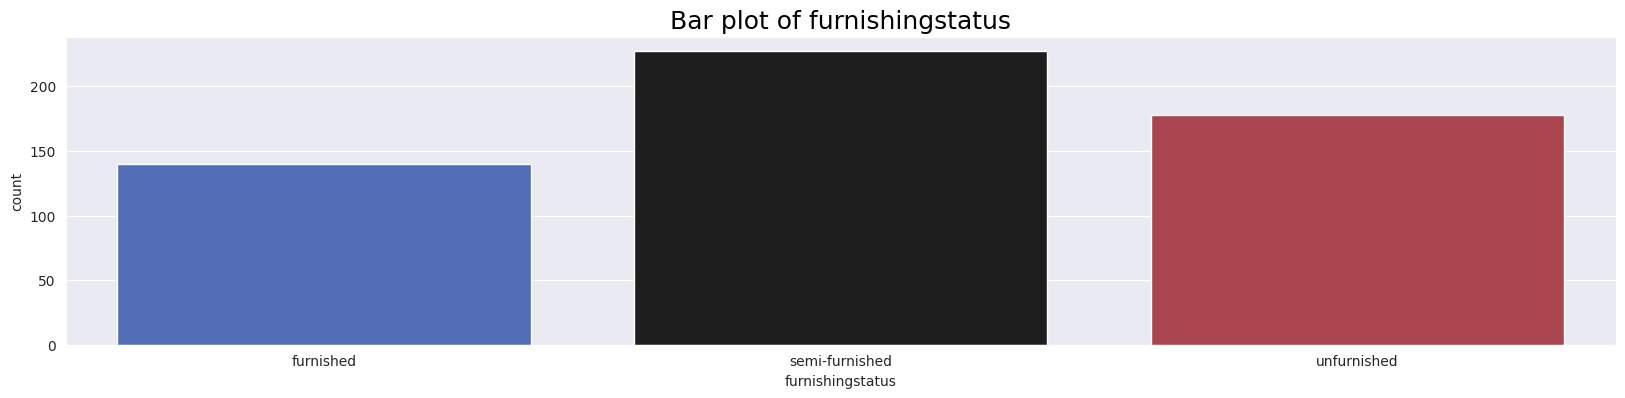

In [31]:
for i in cat_col:
    plt.figure(figsize=(20,4))
    sns.countplot(data=data,x=i,palette='icefire')
    plt.title(f'Bar plot of {i}',fontdict = {'size': 18,'color':'Black'})
    plt.show()

# **Feature Engineering**

Removing Outliers

In [32]:
data.drop(index= data[data.price>10000000].index,inplace=True)


Feature Scaling

In [34]:
X = data.drop(columns='price')
y = data['price']/10000000            # divinding the price for normalization

feature_num = X.select_dtypes(exclude='object').columns
feature_cat = X.select_dtypes(include='object').columns
#X[feature_num] = X[feature_num]/X[feature_num].max()

Preprocessing

In [35]:
preprocessor = make_column_transformer((MinMaxScaler(),feature_num),
                                       (OneHotEncoder(handle_unknown='ignore'),feature_cat))

Train Test Split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [37]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [38]:
X_train.shape


(375, 21)

# Deep Learning Model

In [39]:
# Define Model layers
model = keras.Sequential([# Input Layer
                          layers.Dense(units=20, activation='relu', input_dim=X_train.shape[1]),

                          # Hidden Layers
                          layers.Dense(500,activation='relu'),
                          layers.Dense(500,activation='relu'),
                          layers.Dense(500,activation='relu'),

                          # Output Layer
                          layers.Dense(1),
                         ])


# optimizer and loss for model
model.compile(optimizer='adam',
              loss='mae',
              metrics=[tf.keras.metrics.RootMeanSquaredError()]
              )


# Early stopper to stop the epochs
early_stoping = keras.callbacks.EarlyStopping(patience=20,
                                              min_delta=0.001,
                                              restore_best_weights=True,
                                             )

In [40]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                440       
                                                                 
 dense_1 (Dense)             (None, 500)               10500     
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 500)               250500    
                                                                 
 dense_4 (Dense)             (None, 1)                 501       
                                                                 
Total params: 512441 (1.95 MB)
Trainable params: 512441 (1.95 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Model fit

In [41]:
# fit the model
house_price = model.fit(X_train,y_train,
                      validation_data=(X_test,y_test),  # validation data
                      batch_size = 128,                 # number of inputs for optimizer
                      epochs = 400,                     # number of iteration
                      callbacks=[early_stoping],        # callback to stop iteration when val loss stops decreasing
                      verbose = 0
                      )

## Loss Plots

In [42]:
error = pd.DataFrame(house_price.history)


<Axes: title={'center': 'RMSE Loss'}>

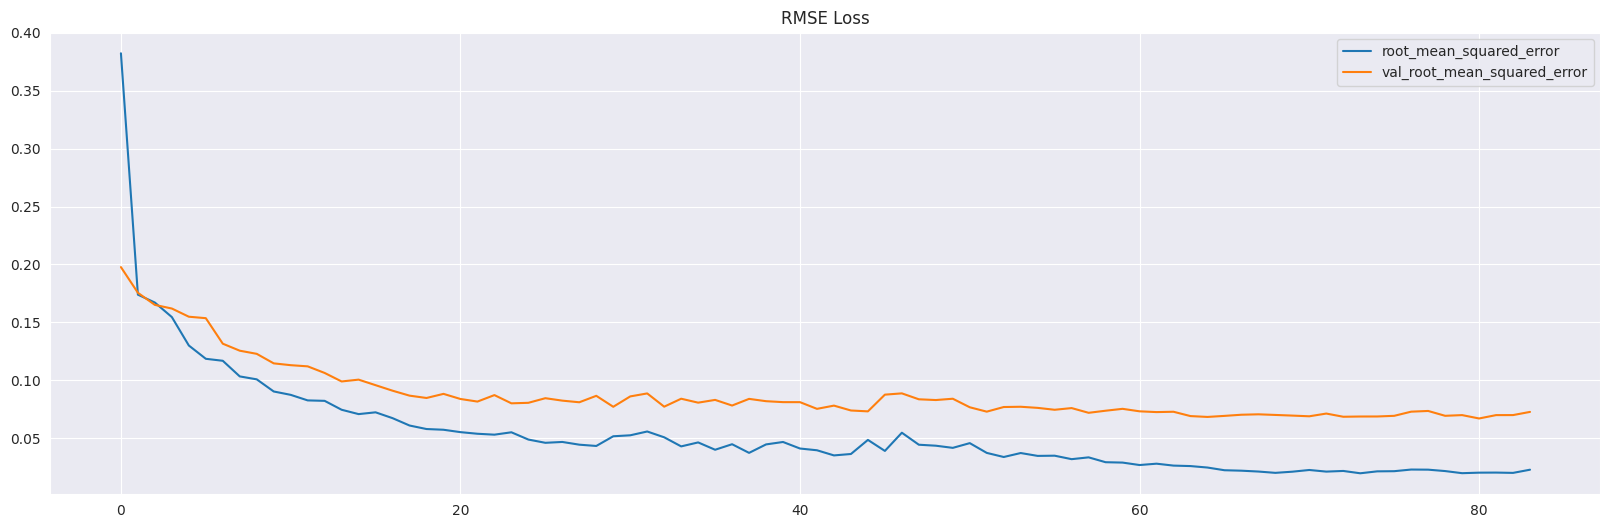

In [43]:
error.loc[:, ['root_mean_squared_error','val_root_mean_squared_error',]].plot(title="RMSE Loss",figsize=(20,6))


<Axes: title={'center': 'MAE Loss'}>

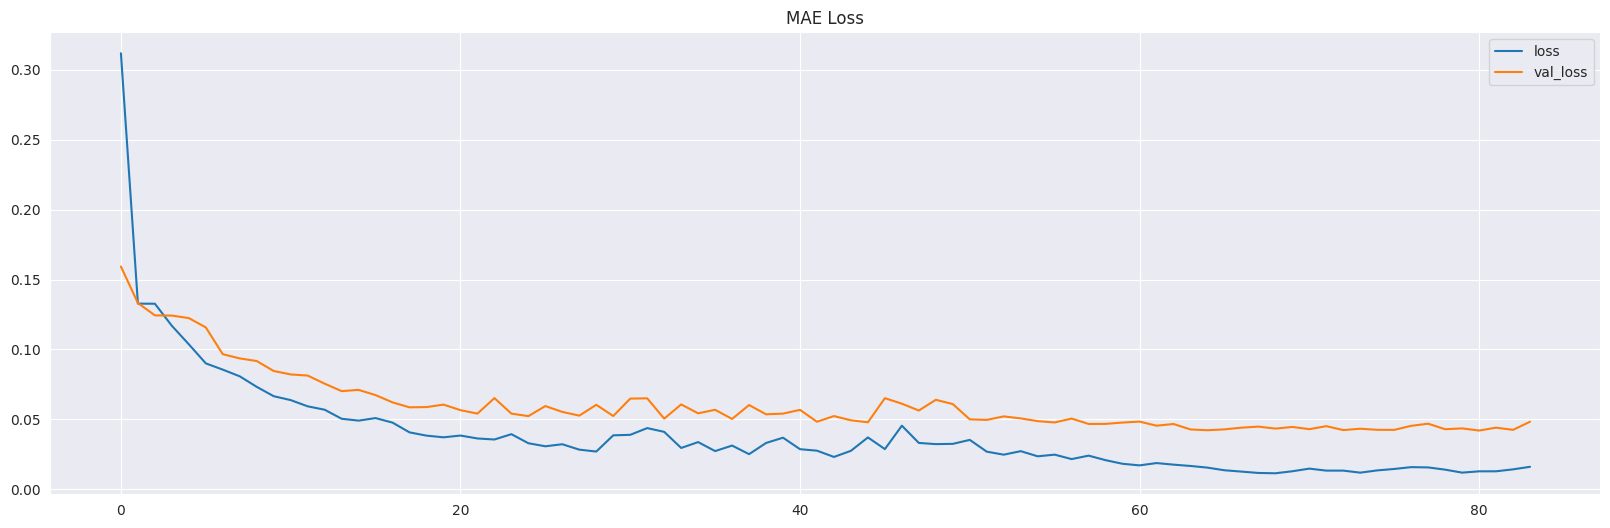

In [44]:
error.loc[:, ['loss','val_loss',]].plot(title="MAE Loss",figsize=(20,6))


### Prediction

In [45]:
pred_train= model.predict(X_train)
print('RMSE of train data:',np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print('RMSE of test data:',np.sqrt(mean_squared_error(y_test,pred)))

12/12 [==============================] - 0s 8ms/step
RMSE of train data: 0.024763057193654233
6/6 [==============================] - 0s 6ms/step
RMSE of test data: 0.06911310603944326


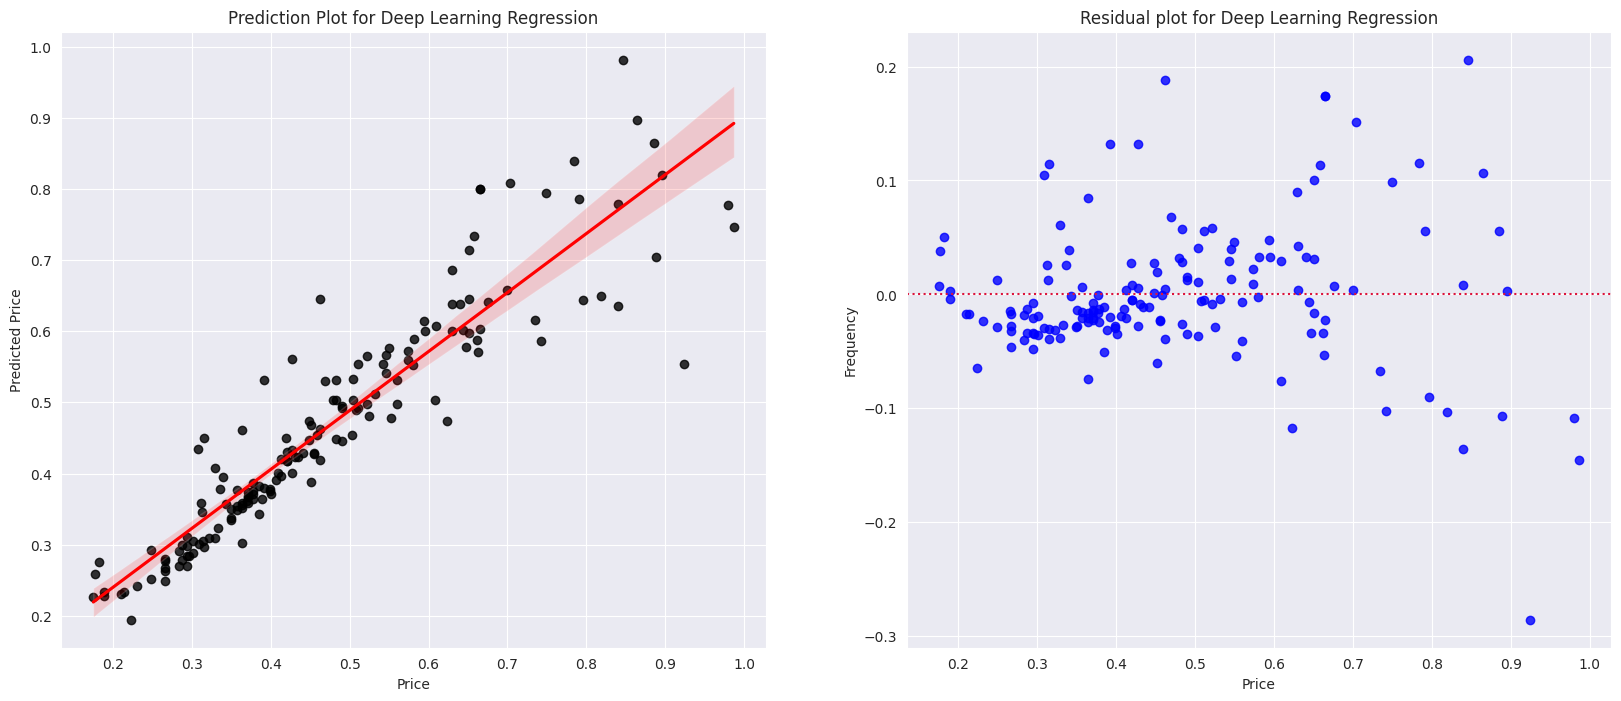

In [47]:
plt.figure(figsize=(20,8))
# Prediction plot
ax1 = plt.subplot(1,2,1)
sns.regplot(data=data,x=y_test,y=pred ,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('Prediction Plot for Deep Learning Regression')
plt.xlabel('Price')
plt.ylabel('Predicted Price')

#Residual plot
ax2 = plt.subplot(1,2,2)
ax=sns.residplot(data= y,x=y_test,y=pred,color='blue')
ax.lines[0].set_color('crimson')
plt.title('Residual plot for Deep Learning Regression')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

### Machine Learning Model

In [48]:
lr = LinearRegression()

lr.fit(X_train,y_train)

pred_train= lr.predict(X_train)
rmse_train_lr=np.sqrt(mean_squared_error(y_train,pred_train))
print('RMSE of train data',rmse_train_lr)

pred = lr.predict(X_test)
rmse_test_lr = np.sqrt(mean_squared_error(y_test,pred))
print('RMSE of test data',rmse_test_lr)

RMSE of train data 0.042514284718788986
RMSE of test data 0.05126853986943848


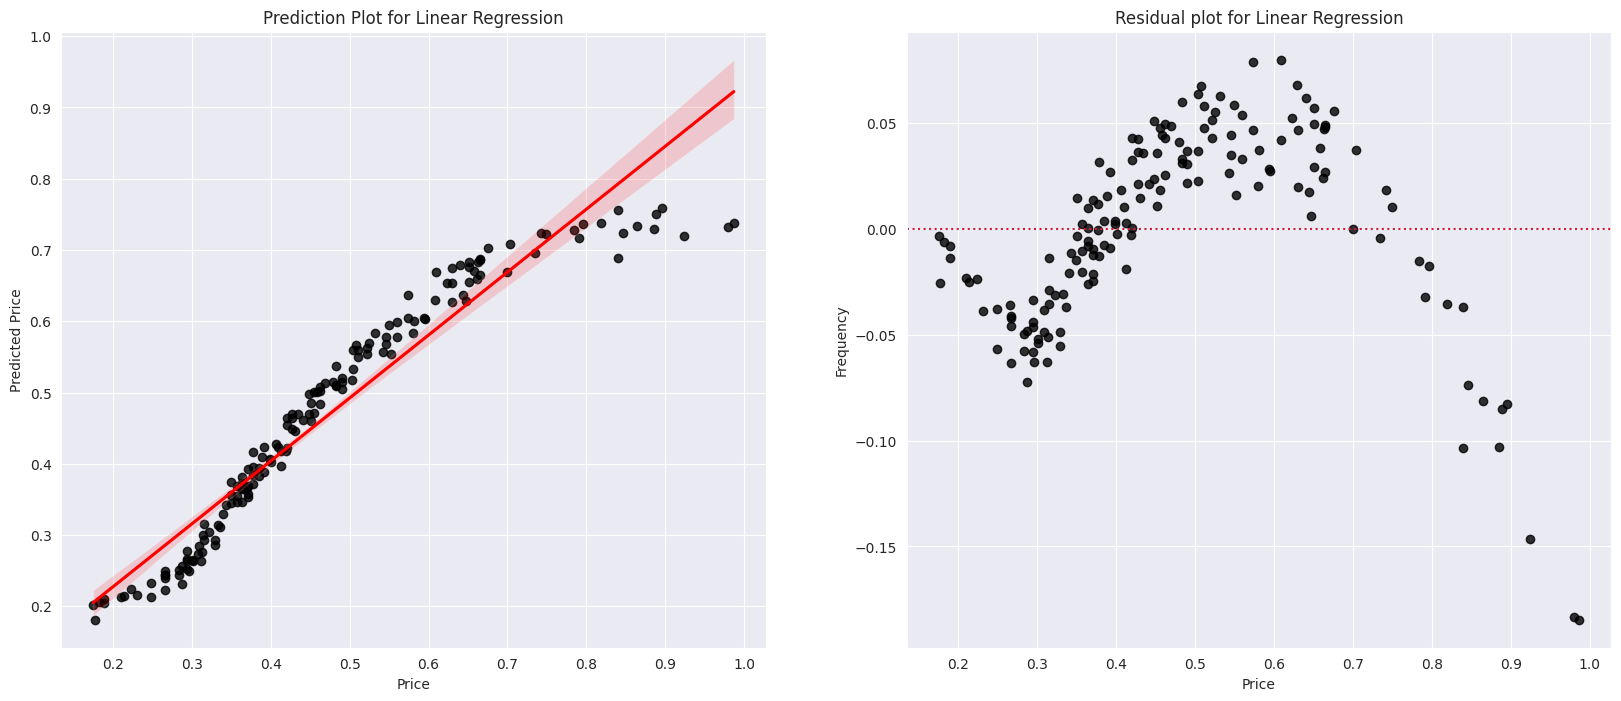

In [49]:
plt.figure(figsize=(20,8))
# Prediction plot
ax1 = plt.subplot(1,2,1)
sns.regplot(data=data,x=y_test,y=pred ,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('Prediction Plot for Linear Regression')
plt.xlabel('Price')
plt.ylabel('Predicted Price')

#Residual plot
ax2 = plt.subplot(1,2,2)
ax=sns.residplot(data= y,x=y_test,y=pred,color='black')
ax.lines[0].set_color('crimson')
plt.title('Residual plot for Linear Regression')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

### **Conslusion**

Deep Learning model performs better than Linear Regression as RMSE of the deep learning model is smaller than the machine learning model.